
<h2 align="center">Experiments (Sander's paper, fig.2)</h2> 

In this experiment we reproduce the experiment from fig.2 in the Elastica paper. We analyze the response of single orientaiton selective neuron (with prefered orientation 1 radian, or around 60 degrees). Its response is modulated by 32 neurons with varying orientation from 0 to pi.

In [1]:
# Imports
import math as m
import numpy as np
import matplotlib.pyplot as plt
import holoviews as hv
import pylab as pl
from pylab import exp,cos,sin,pi,tan, pi
import pandas as pd
import seaborn as sb
import holoviews as hv
from IPython.display import SVG
import io
from PIL import Image
from random import random
import elastica as el
import elastica_neurons as en
from dynamics import *
%matplotlib inline
hv.notebook_extension()

/afs/inf.ed.ac.uk/user/s12/s1247380/Documents/HonoursProject/Python/venv/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
en.E(0,0,[-1,0])

array([ 0.])

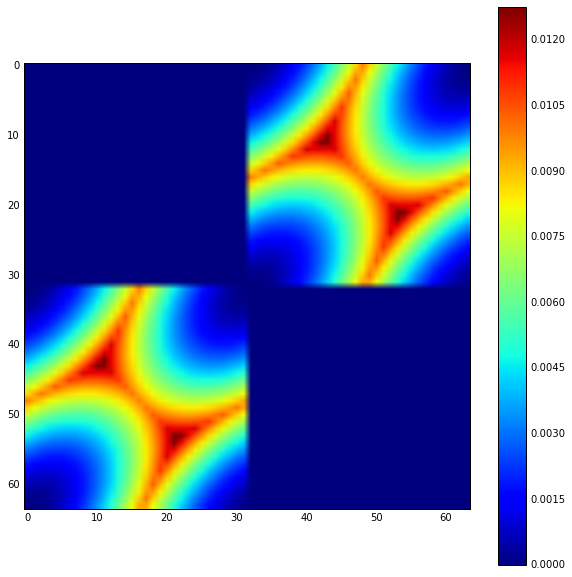

In [3]:
weights = generateWeightMatrix(type='el',m=1,n=2,nosn=32)
showWeights(weights, fig_size=10)

In [7]:
flanker

array([ 0.        ,  0.16534698,  0.33069396,  0.49604095,  0.66138793,
        0.82673491,  0.99208189,  1.15742887,  1.32277585,  1.48812284,
        1.65346982,  1.8188168 ,  1.98416378,  2.14951076,  2.31485774,
        2.48020473,  2.64555171,  2.81089869,  2.97624567,  3.14159265])

Maybe start with only 2x1 matrix...

The weight matrix shows the full connectivity between all the orientation selective neurons in every part of the visual field. If we have the matrix mxnxnosn, we unroll them in a vector with lenght L=m*n*nosn. Our weight matrix has size LxL, defining the full connectivity between neurons. We index the matrix by varying nosn, then n and finally m. In order to exaplin the structure of the matrix, we take the simple example of 2x3 visual field with 32 orientation selective neurons in every field. Every 32x32 square represents the connectivity between all neurons in a part of the visual field. The diagonal squares are all zeros as there is don't assume any modulation between neurons from the same receptive field.

(For indexing the picture, you can put (0,0), (0,1), ... representing the location of the orientation selective neurons in the visual field)

It is a bit easier to explain the matrix when you remove the distance factor, as well as the continue statement for neurons in the same receptive field.

If we take the first row, this describes the the connection between the neurons in the first receptive field, with the connection from the rest of the neurons with the rest of the receptive fields. The squares recepresent the following connections, starting from the first - 0x0, 0x1, 0x2, 1x0, 1x1, 1x2

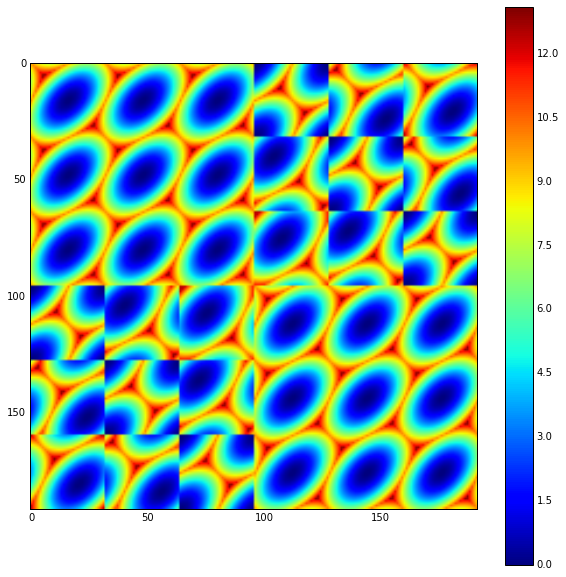

In [8]:
weights = generateWeightMatrix(type='el',m=2,n=3,nosn=32)
showWeights(weights, fig_size=10)

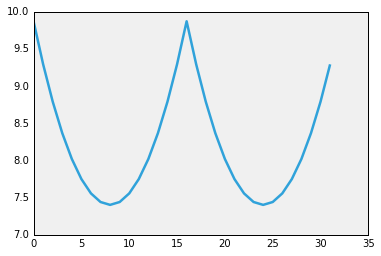

In [10]:
plt.plot(weights[0,0:32])

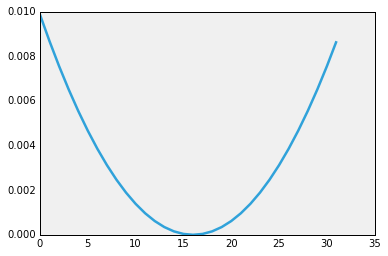

In [10]:
plt.plot(weights[16,32:64])

In [16]:
for i in range(2*3*32):
    print calculateCoordinatesNew(i, [2,3,32])

[ 0.  0.  0.]
[ 0.  0.  1.]
[ 0.  0.  2.]
[ 0.  0.  3.]
[ 0.  0.  4.]
[ 0.  0.  5.]
[ 0.  0.  6.]
[ 0.  0.  7.]
[ 0.  0.  8.]
[ 0.  0.  9.]
[  0.   0.  10.]
[  0.   0.  11.]
[  0.   0.  12.]
[  0.   0.  13.]
[  0.   0.  14.]
[  0.   0.  15.]
[  0.   0.  16.]
[  0.   0.  17.]
[  0.   0.  18.]
[  0.   0.  19.]
[  0.   0.  20.]
[  0.   0.  21.]
[  0.   0.  22.]
[  0.   0.  23.]
[  0.   0.  24.]
[  0.   0.  25.]
[  0.   0.  26.]
[  0.   0.  27.]
[  0.   0.  28.]
[  0.   0.  29.]
[  0.   0.  30.]
[  0.   0.  31.]
[ 0.  1.  0.]
[ 0.  1.  1.]
[ 0.  1.  2.]
[ 0.  1.  3.]
[ 0.  1.  4.]
[ 0.  1.  5.]
[ 0.  1.  6.]
[ 0.  1.  7.]
[ 0.  1.  8.]
[ 0.  1.  9.]
[  0.   1.  10.]
[  0.   1.  11.]
[  0.   1.  12.]
[  0.   1.  13.]
[  0.   1.  14.]
[  0.   1.  15.]
[  0.   1.  16.]
[  0.   1.  17.]
[  0.   1.  18.]
[  0.   1.  19.]
[  0.   1.  20.]
[  0.   1.  21.]
[  0.   1.  22.]
[  0.   1.  23.]
[  0.   1.  24.]
[  0.   1.  25.]
[  0.   1.  26.]
[  0.   1.  27.]
[  0.   1.  28.]
[  0.   1.  29.]
[  0. 

Above. The lower the energy, the easier two bars can be connected to each other.

Calculate h, in additive and multiplicate models